# Handling Missing Values using Sci-kit learn

In [ ]:
 import numpy as np 
 import pandas as pd 
 import matplotlib.pyplot as plt
 import seaborn as sns
 from sklearn.impute import SimpleImputer


In [4]:
loan_data = pd.read_csv('loan.csv')

In [ ]:
loan_data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
loan_data.select_dtypes(include = "float64").columns

Index(['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History'],
      dtype='object')

In [ ]:
si = SimpleImputer(strategy = "mean")
arr = si.fit_transform(loan_data[['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History']])

In [ ]:
new_loan_data = pd.DataFrame(arr, columns = loan_data.select_dtypes(include = "float64").columns)

In [ ]:
new_loan_data.isnull().sum()

CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [ ]:
new_loan_data.head(10)

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,146.412162,360.0,1.0
1,1508.0,128.000000,360.0,1.0
2,0.0,66.000000,360.0,1.0
3,2358.0,120.000000,360.0,1.0
4,0.0,141.000000,360.0,1.0
5,4196.0,267.000000,360.0,1.0
6,1516.0,95.000000,360.0,1.0
7,2504.0,158.000000,360.0,0.0
8,1526.0,168.000000,360.0,1.0
9,10968.0,349.000000,360.0,1.0


In [ ]:
new_loan_data.mean()

CoapplicantIncome    1621.245798
LoanAmount            146.412162
Loan_Amount_Term      342.000000
Credit_History          0.842199
dtype: float64

# One Hot Encoding

In [ ]:
loan_data.select_dtypes(include = 'object').columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

#### Using getdummies we can perform one hot encoding (Pandas method)

In [6]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
loan_data["Gender"].fillna(loan_data["Gender"].mode()[0], inplace=True) 

In [17]:
loan_data["Married"].fillna(loan_data["Married"].mode()[0], inplace=True) 

In [18]:
en_data = loan_data[["Gender", "Married"]]
en_data.head(10)

,Gender,Married
0,Male,No
1,Male,Yes
2,Male,Yes
3,Male,Yes
4,Male,No
5,Male,Yes
6,Male,Yes
7,Male,Yes
8,Male,Yes
9,Male,Yes


In [19]:
pd.get_dummies(en_data)

,Gender_Female,Gender_Male,Married_No,Married_Yes
0,False,True,True,False
1,False,True,False,True
2,False,True,False,True
3,False,True,False,True
4,False,True,True,False
...,...,...,...,...
609,True,False,True,False
610,False,True,False,True
611,False,True,False,True
612,False,True,False,True


In [22]:
pd.get_dummies(en_data).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Gender_Female  614 non-null    bool 
 1   Gender_Male    614 non-null    bool 
 2   Married_No     614 non-null    bool 
 3   Married_Yes    614 non-null    bool 
dtypes: bool(4)
memory usage: 2.5 KB


#### One Hot encoding (Sci-kit library)

In [10]:
from sklearn.preprocessing import OneHotEncoder

In [26]:
ohe = OneHotEncoder(drop = 'first')
ohe_arr = ohe.fit_transform(en_data).toarray()
ohe_arr

array([[1., 0.],
       [1., 1.],
       [1., 1.],
       ...,
       [1., 1.],
       [1., 1.],
       [0., 0.]], shape=(614, 2))

In [28]:
pd.DataFrame(ohe_arr, columns = ["Gender_Male", "Married_Yes"])

,Gender_Male,Married_Yes
0,1.0,0.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,0.0
...,...,...
609,0.0,0.0
610,1.0,1.0
611,1.0,1.0
612,1.0,1.0


# Label Encoding

In [29]:
snacks = pd.DataFrame({"items" : ["Lazy", "Biscuit", "chips", "cool drinks", "chocolates"]})
snacks

,items
0,Lazy
1,Biscuit
2,chips
3,cool drinks
4,chocolates


In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le_snacks = LabelEncoder()
le_snacks.fit_transform(snacks["items"]) 

array([1, 0, 2, 4, 3])

In [32]:
snacks['items_le'] = le_snacks.fit_transform(snacks["items"])
snacks

,items,items_le
0,Lazy,1
1,Biscuit,0
2,chips,2
3,cool drinks,4
4,chocolates,3


In [33]:
loan_data["Property_Area"].fillna(loan_data["Property_Area"].mode()[0])

0          Urban
1          Rural
2          Urban
3          Urban
4          Urban
         ...    
609        Rural
610        Rural
611        Urban
612        Urban
613    Semiurban
Name: Property_Area, Length: 614, dtype: object

In [34]:
property_LE = LabelEncoder()
loan_data["Property_Area_LE"] = property_LE.fit_transform(loan_data["Property_Area"])

In [35]:
loan_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Property_Area_LE
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,2
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,2
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,2
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,2
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,2
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,2
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,1
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,2
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,1


# Ordinal Encoding

Ordinal Encoding in done by two performs
- Cyclic Line
- Map Function

In [37]:
size = pd.DataFrame({"Size" : ["XL", "L", "M", "S", "XL", "M", "L", "S","XL", "L", "M", "S"]})
size.head(4)

,Size
0,XL
1,L
2,M
3,S


In [38]:
ord_data = [["XL", "L", "M", "S"]]

In [39]:
from sklearn.preprocessing import OrdinalEncoder

In [40]:
size_OE = OrdinalEncoder(categories = ord_data)
size["Size_Ord"] = size_OE.fit_transform(size[["Size"]])
size

,Size,Size_Ord
0,XL,0.0
1,L,1.0
2,M,2.0
3,S,3.0
4,XL,0.0
5,M,2.0
6,L,1.0
7,S,3.0
8,XL,0.0
9,L,1.0


In [41]:
ord_data1 = {"S" : 0, "M" : 1, "L" : 2, "XL" : 3}
size["Size_Map"] = size["Size"].map(ord_data1)
size

,Size,Size_Ord,Size_Map
0,XL,0.0,3
1,L,1.0,2
2,M,2.0,1
3,S,3.0,0
4,XL,0.0,3
5,M,2.0,1
6,L,1.0,2
7,S,3.0,0
8,XL,0.0,3
9,L,1.0,2


# Feature Scaling

## Standardization

Standardization is a very effective technique which re-scale a feature value so that it has distribution with 0 mean value and variance equals to 1.

             X_new = (Xi - X_mean)/std

In [45]:
loan_data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Property_Area_LE      0
dtype: int64

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

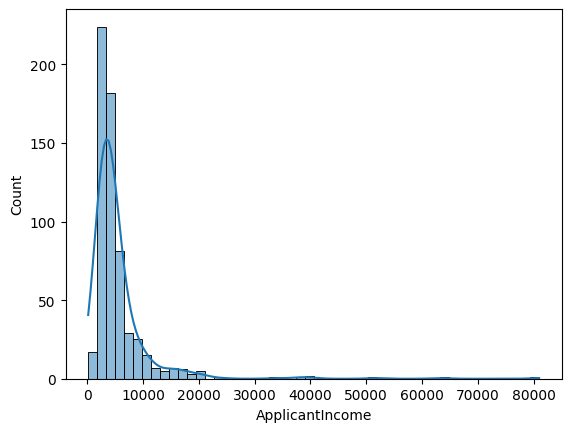

In [49]:
sns.histplot(loan_data['ApplicantIncome'], kde= True)

In [50]:
from sklearn.preprocessing import StandardScaler

In [52]:
ss = StandardScaler()
loan_data["ApplicantIncome_ss"] = ss.fit_transform(loan_data[['ApplicantIncome']])
loan_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Property_Area_LE,ApplicantIncome_ss
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,2,0.072991
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,-0.134412
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,2,-0.393747
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,2,-0.462062
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,2,0.097728
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,2,0.002218
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,2,-0.503019
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,1,-0.387850
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,2,-0.228939
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,1,1.218457


## Normalization (Min-Max Scaling)

Normalization is scaling technique in which values are shifted and rescaled so that they endup ranging between 0 and 1. It is also known as Min-Max scaling

- values in dataset reduce according to min and max value of dataset
- where the range between 0 to 1

                              X_new = (Xi-min(X))/max(X)-min(X)  

In [53]:
loan_data['CoapplicantIncome'].isnull().sum()

np.int64(0)

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
mms = MinMaxScaler()
loan_data["CoapplicantIncome_mm"] = mms.fit_transform(loan_data[['CoapplicantIncome']])
loan_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Property_Area_LE,ApplicantIncome_ss,CoapplicantIncome_mm
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,2,0.072991,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,-0.134412,0.036192
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,2,-0.393747,0.000000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,2,-0.462062,0.056592
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,2,0.097728,0.000000
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,2,0.002218,0.100703
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,2,-0.503019,0.036384
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,1,-0.387850,0.060096
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,2,-0.228939,0.036624
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,1,1.218457,0.263230


# Handling Duplicate data

##### To find duplicates

In [58]:
loan_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 614, dtype: bool

##### To find total no of duplicates

In [59]:
loan_data.duplicated().sum()

np.int64(0)

##### To remove duplicate

In [ ]:
loan_data.drop_duplicates(inplace = True)

##### To keep only first duplicate value

In [ ]:
loan_data.drop_duplicates(inplace = True, keep = 'first')

# Replace and Data Type Change

In [61]:
loan_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Property_Area_LE,ApplicantIncome_ss,CoapplicantIncome_mm
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,2,0.072991,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,-0.134412,0.036192
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,2,-0.393747,0.000000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,2,-0.462062,0.056592
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,2,0.097728,0.000000
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,2,0.002218,0.100703
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,2,-0.503019,0.036384
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,1,-0.387850,0.060096
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,2,-0.228939,0.036624
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,1,1.218457,0.263230


In [60]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Loan_ID               614 non-null    object 
 1   Gender                614 non-null    object 
 2   Married               614 non-null    object 
 3   Dependents            599 non-null    object 
 4   Education             614 non-null    object 
 5   Self_Employed         582 non-null    object 
 6   ApplicantIncome       614 non-null    int64  
 7   CoapplicantIncome     614 non-null    float64
 8   LoanAmount            592 non-null    float64
 9   Loan_Amount_Term      600 non-null    float64
 10  Credit_History        564 non-null    float64
 11  Property_Area         614 non-null    object 
 12  Loan_Status           614 non-null    object 
 13  Property_Area_LE      614 non-null    int64  
 14  ApplicantIncome_ss    614 non-null    float64
 15  CoapplicantIncome_mm  6

In [66]:
loan_data['Dependents'].isnull().sum()

np.int64(15)

In [64]:
loan_data['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [67]:
loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0], inplace = True)

In [68]:
loan_data['Dependents'].isnull().sum()

np.int64(0)

##### To replace value

In [70]:
loan_data['Dependents'].replace("3+", "3", inplace = True)

In [71]:
loan_data['Dependents'].value_counts()

Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64

##### To change data type

In [73]:
loan_data['Dependents'] = loan_data['Dependents'].astype('int64')

In [74]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Loan_ID               614 non-null    object 
 1   Gender                614 non-null    object 
 2   Married               614 non-null    object 
 3   Dependents            614 non-null    int64  
 4   Education             614 non-null    object 
 5   Self_Employed         582 non-null    object 
 6   ApplicantIncome       614 non-null    int64  
 7   CoapplicantIncome     614 non-null    float64
 8   LoanAmount            592 non-null    float64
 9   Loan_Amount_Term      600 non-null    float64
 10  Credit_History        564 non-null    float64
 11  Property_Area         614 non-null    object 
 12  Loan_Status           614 non-null    object 
 13  Property_Area_LE      614 non-null    int64  
 14  ApplicantIncome_ss    614 non-null    float64
 15  CoapplicantIncome_mm  6

# Function Transformer

- need to fill missing values
- need to to remove outliers

In [107]:
dataset1 = pd.read_csv('loan.csv')

In [108]:
dataset1.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [110]:
dataset1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

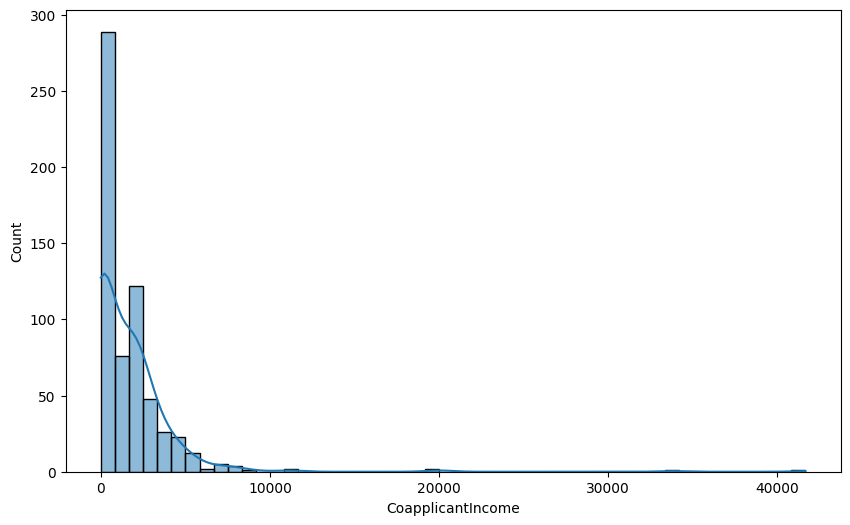

In [112]:
plt.figure(figsize = (10,6))
sns.histplot(data = dataset1, x = 'CoapplicantIncome', kde = True)
plt.show()

In [91]:
q1 = dataset['CoapplicantIncome'].quantile(0.25)
q3 = dataset['CoapplicantIncome'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
lower, upper

(np.float64(-3445.875), np.float64(5743.125))

In [ ]:
dataset1 = dataset[(dataset['CoapplicantIncome'] < lower) | (dataset['CoapplicantIncome'] > upper)]

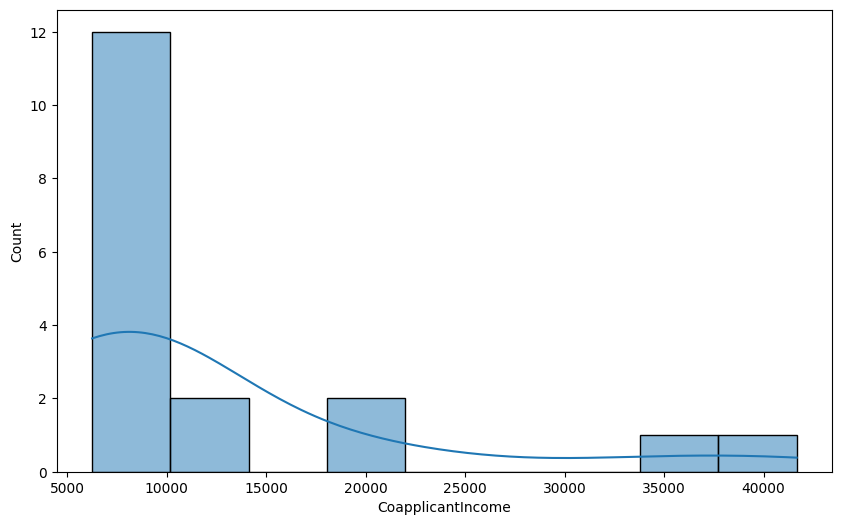

In [99]:
plt.figure(figsize = (10,6))
sns.histplot(data = dataset, x = 'CoapplicantIncome', kde = True)
plt.show()

In [100]:
from sklearn.preprocessing import FunctionTransformer

In [103]:
ft = FunctionTransformer(func = np.log1p, validate = True)

In [104]:
dataset['CoapplicantIncome_tf'] = ft.fit_transform(dataset[['CoapplicantIncome']])

In [105]:
dataset.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,CoapplicantIncome_tf
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,9.302828
12,LP001028,Male,Yes,2,Graduate,No,3073,8106.0,200.0,360.0,1.0,Urban,Y,9.000483
38,LP001114,Male,No,0,Graduate,No,4166,7210.0,184.0,360.0,1.0,Urban,Y,8.883363
122,LP001431,Female,No,0,Graduate,No,2137,8980.0,137.0,360.0,0.0,Semiurban,Y,9.102867
135,LP001488,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban,N,8.955577
177,LP001610,Male,Yes,3+,Graduate,No,5516,11300.0,495.0,360.0,0.0,Semiurban,N,9.332646
180,LP001633,Male,Yes,1,Graduate,No,6400,7250.0,180.0,360.0,0.0,Urban,N,8.888895
253,LP001843,Male,Yes,1,Not Graduate,No,2661,7101.0,279.0,180.0,1.0,Semiurban,Y,8.868132
349,LP002138,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural,Y,8.740497
372,LP002201,Male,Yes,2,Graduate,Yes,9323,7873.0,380.0,300.0,1.0,Rural,Y,8.971321


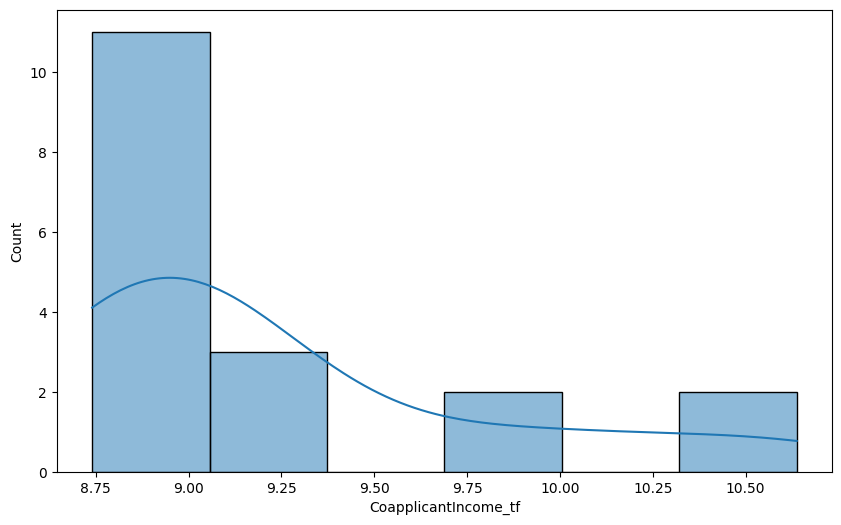

In [106]:
plt.figure(figsize = (10,6))
sns.histplot(data = dataset, x = 'CoapplicantIncome_tf', kde = True)
plt.show()